In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [19]:
iris = load_iris()
iris.keys()

dict_keys(['feature_names', 'data', 'DESCR', 'target_names', 'target'])

In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)

In [36]:
X_train.shape

(112, 4)

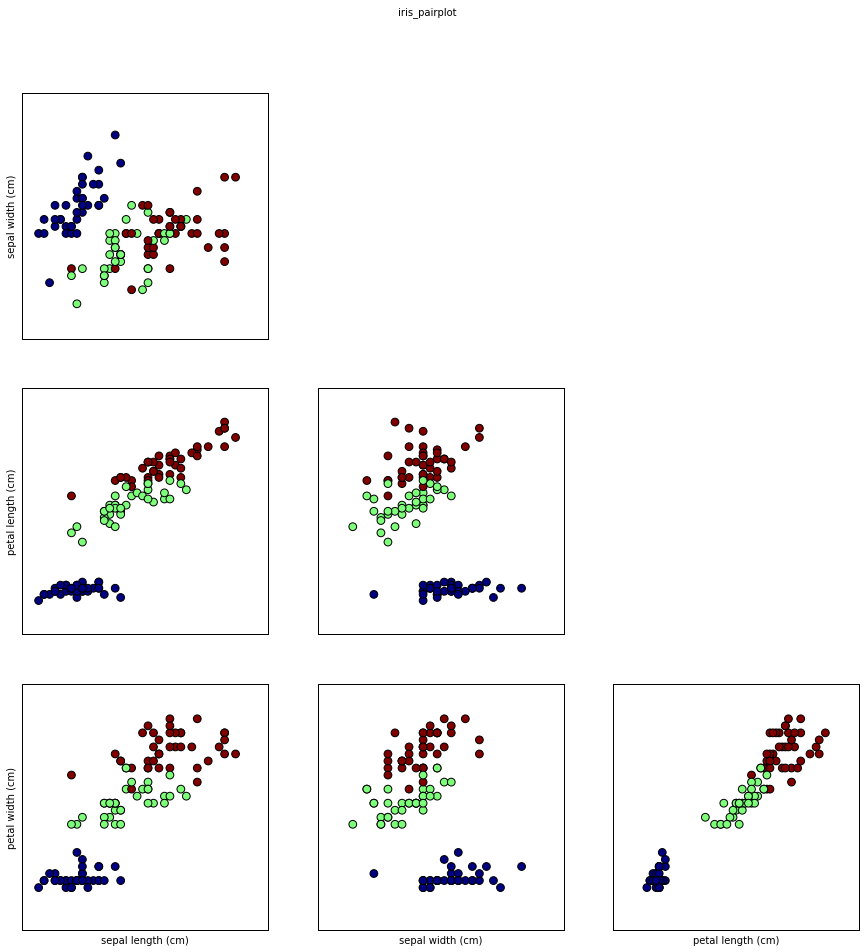

In [27]:
fig, ax = plt.subplots(3,3,figsize=(15,15))
plt.suptitle('iris_pairplot')

for i in range(3):
    for j in range(3):
        ax[i,j].scatter(X_train[:,j], X_train[:,i+1],c=y_train, s=60)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        if i == 2:
            ax[i,j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i,j].set_ylabel(iris['feature_names'][i+1])
        if j > i:
            ax[i,j].set_visible(False)

In [30]:
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
#criando o modelo de treinamento
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [32]:
#Imagine we found an iris in the wild with a sepal length of 5cm, a sepal width of
#2.9cm, a petal length of 1cm and a petal width of 0.2cm. What species of iris would
#this be?
X_new = np.array([[5,2.9,1,0.2]])
X_new.shape

(1, 4)

In [33]:
prediction = knn.predict(X_new)
iris['target_names'][prediction]

array(['setosa'], 
      dtype='<U10')

In [34]:
#avaliando a veracidade do predict
knn.score(X_test, y_test)

0.97368421052631582